## Mass-Spring-Damper
### 1. Differential equation
### 2. Transfer function
### 3. Space states

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import control as ct

# Forces plots to appear in the ipython notebook
%matplotlib inline

### 1. Differential equation

In [13]:
# Define the differential equation function
def massSpringDamper(state, t):
    # Parameters
    m = 1 # Kg
    k = 5 # N/m
    d = 2 # N*s/m
    
    # Forcing function
    f = 10 # N
    
    # Position, velocity, acceleration
    x = state[0]
    dx = state[1]
    d2x = -k*x/m -d*dx/m + f/m
    
    return [dx, d2x]

In [14]:
tf = 8.0  # final time
dt = 0.01  # step
t = np.arange(0, tf, dt)

# Initial conditions [position, velocity]
state0 = [0.0, 0.0]

val = odeint(massSpringDamper, state0, t)

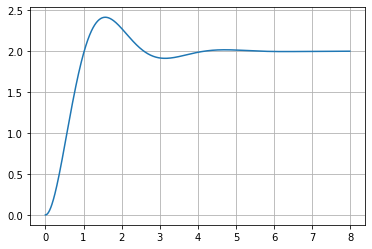

In [15]:
# Plot
plt.plot(t, val[:,0])
plt.grid()

## 2. Transfer function

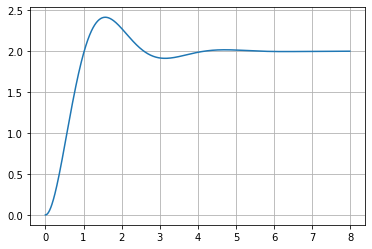

In [23]:
# Parameters
m = 1 # Kg
k = 5 # N/m
d = 2 # N*s/m

f = 10 # N

# Transfer function
num = [1/m]
den = [1, d/m, k/m]
G = ct.tf(num,den)

# Input
r = f*np.ones(len(t))

# Response
_, c1 = ct.forced_response(G, t, r)

#Plot
plt.plot(t, c1)
plt.grid()

## State space

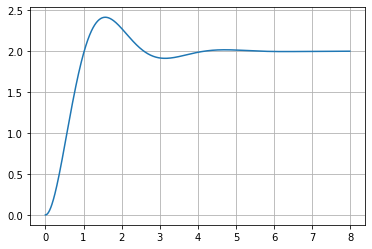

In [27]:
# Matices
A = np.array([[  0,    1 ],
              [-k/m, -d/m]])
B = np.array([0, 1/m]).reshape(2,1)
C = np.array([[ 1, 0 ],
              [ 0, 1 ]])
D = np.array([0, 0]).reshape(2,1)

# System
g = ct.ss(A, B, C, D)

# Initial conditions [position, velocity]
state0 = [0.0, 0.0]

# Response
_, c2 = ct.forced_response(g, t, r, state0)

# Plot
plt.plot(t, c2[0, :])
plt.grid()